In [3]:
# libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# Read csv file 
file_path = "C:\\Users\\user\\Downloads\\Mental_Health.csv"
df = pd.read_csv(file_path)
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [110]:
# Rename columns
columns = df.columns
df.rename({columns[15]:'Suicidal thoughts', columns[18]:'Mental Illness'},axis=1,inplace=True)

In [111]:
# Dropped columns
try:
    df = df.drop(['id','Name','City'],axis=1)
except Exception as e:
    print('Already Dropped')
else:
    print('Dropped succesfully')

Dropped succesfully


In [112]:
sleep_categories = df['Sleep Duration'].unique()

def categorize_sleep(duration):
    if ('Less than 5 hours' in duration 
        or '1-2 hours' in duration 
        or '2-3 hours' in duration):
        return 1  # for sleep less than 5 hours
    elif ('5-6 hours' in duration or '6-8 hours' in duration or
          '7-8 hours' in duration or '8 hours' in duration):
        return 2  # sleep between 5 to 8 hours
    elif ('More than 8 hours' in duration 
          or '9-11 hours' in duration 
          or '10-11 hours' in duration):
        return 3 # sleep more than 8 hours
    else:
        return np.nan  # unrelated data return as null values

# Apply the categorization function to the 'Sleep Duration' column
df['Sleep Duration'] = df['Sleep Duration'].apply(categorize_sleep)

# Backward fillNa on the data and change to integer
df['Sleep Duration'] = df['Sleep Duration'].fillna(method='bfill').astype('Int64')

C:\Users\user\AppData\Local\Temp\ipykernel_15568\275141160.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Sleep Duration'] = df['Sleep Duration'].fillna(method='bfill').astype('Int64')


In [113]:
habits_categories = df['Dietary Habits'].unique()

def categorize_habits(habits):
    if pd.isna(habits): 
        return np.nan # for value is null return the same
    elif 'Health' in habits or 'More Healthy' in habits:
        return 1  # Healthy
    elif 'Moderate' in habits:
        return 2  # Moderate
    elif ('Unhealthy' in habits or 'Less than Healthy' in habits or
          'No Healthy' in habits or 'Less Healthy' in habits):
        return 3  # Unhealthy
    else:
        return np.nan # unrelated data return as null values

# Apply the categorization function to the 'Dietary Habits' column
df['Dietary Habits'] = df['Dietary Habits'].apply(categorize_habits)

# Backward fillNa on the data and change to integer
df['Dietary Habits'] = df['Dietary Habits'].fillna(method='bfill').astype('Int64')

C:\Users\user\AppData\Local\Temp\ipykernel_15568\902036257.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Dietary Habits'] = df['Dietary Habits'].fillna(method='bfill').astype('Int64')


In [114]:
def categorize_degree(degree):
    if pd.isna(degree):
        return np.nan #for value is null return the same
    
    excluded_names = [
        'Unite', 'Vrinda', 'Badhya', 'Bhavesh', 'Vivaan', 'Brit', 
        'Brithika', 'Ritik', 'CGPA', 'Pihu', 'Aarav', 'Lata', 
        'Navya', 'Marsh', 'Mahika', 'Mthanya', 'Esha', 'Mihir', 'Advait'
    ] # Unwanted names which will return as null values
    
    if degree in excluded_names:
        return np.nan 
    
    jobs = ['Doctor', 'Business Analyst', 'Plumber', 'Entrepreneur',
            'UX/UI Designer', 'Data Scientist', 
            'HR Manager'] # for jobs which requires certain types of degree 
    
    if (degree == jobs[0] or degree == jobs[3]
        or degree == jobs[5]):
        return 1 # PHD
    elif (degree == jobs[1] or degree == jobs[6]):
        return 2 # MASTER
    elif (degree == jobs[4]):
        return 3 # BACHELOR
    elif (degree == jobs[2]):
        return 4 # COMMUNITY
    
    
    degree = str(degree)
    if (degree.startswith('P')):
        return 1 # PHD
    elif (degree.startswith('M')):
        return 2 # MASTER
    elif (degree.startswith('B')):
        return 3 # BACHELOR
    elif (degree.startswith('L')):
        return 4 # COMMUNITY
    elif degree.startswith('K') or degree.startswith('C'):
        return 5  # HIGH SCHOOL
    else:
        return np.nan # Unwanted data return as null

# Apply the categorization function to the 'Degree' column
df['Degree'] = df['Degree'].apply(categorize_degree)

# Backward fillNa on the data and change to integer
df['Degree'] = df['Degree'].fillna(method='bfill').astype('Int64')

C:\Users\user\AppData\Local\Temp\ipykernel_15568\2460523702.py:47: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Degree'] = df['Degree'].fillna(method='bfill').astype('Int64')


In [115]:
# Categorize age using range
def convert_age_range(age):
    if 18 <= age < 30:
        return 1
    elif 30 <= age < 40:
        return 2
    elif 40 <= age < 50:
        return 3
    else:
        return 4

def convert_gpa_range(gpa):
        if 5 <= gpa < 6.5:
            return 1
        elif 6.5 <= gpa < 8:
            return 2
        else:
            return 3

# Convert values (i.e. continuous or string) to categorical numerical values
def convert_to_categorical(dataframe,column_name):
    label_encoder = LabelEncoder() 
    dataframe[column_name] = label_encoder.fit_transform(dataframe[column_name])
    

In [116]:
# Convert values to categorical numerical values
convert_to_categorical(df, 'Suicidal thoughts')
convert_to_categorical(df, 'Mental Illness')
convert_to_categorical(df, 'Gender')


In [117]:
# Forward fillNa
df['Financial Stress'] = df['Financial Stress'].fillna(method='bfill').astype('Int64')

C:\Users\user\AppData\Local\Temp\ipykernel_15568\3118134759.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Financial Stress'] = df['Financial Stress'].fillna(method='bfill').astype('Int64')


In [118]:
# Convert float number to numerical values
df['Job Satisfaction'] = df['Job Satisfaction'].astype('Int64')
df['Work Pressure'] = df['Work Pressure'].astype('Int64')
df['Study Satisfaction'] = df['Study Satisfaction'].astype('Int64')
df['Academic Pressure'] = df['Academic Pressure'].astype('Int64')
df['Age'] = df['Age'].astype('Int64')
df['Work/Study Hours'] = df['Work/Study Hours'].astype('Int64')
df.head()

,Gender,Age,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal thoughts,Work/Study Hours,Financial Stress,Mental Illness,Depression
0,0,49,Working Professional,Chef,<NA>,5,NaN,<NA>,2,2,1,3,0,1,2,0,0
1,1,26,Working Professional,Teacher,<NA>,4,NaN,<NA>,3,1,3,4,1,7,3,0,1
2,1,33,Student,NaN,5,<NA>,8.97,2,<NA>,2,1,3,1,3,1,0,1
3,1,22,Working Professional,Teacher,<NA>,5,NaN,<NA>,1,1,2,3,1,10,1,1,1
4,0,30,Working Professional,Business Analyst,<NA>,1,NaN,<NA>,1,2,3,3,1,9,4,1,0


In [119]:
# Check missing data
df.isna().sum()

Gender                                  0
Age                                     0
Working Professional or Student         0
Profession                          36630
Academic Pressure                  112803
Work Pressure                       27918
CGPA                               112802
Study Satisfaction                 112803
Job Satisfaction                    27910
Sleep Duration                          0
Dietary Habits                          0
Degree                                  0
Suicidal thoughts                       0
Work/Study Hours                        0
Financial Stress                        0
Mental Illness                          0
Depression                              0
dtype: int64

In [120]:
# print the first few rows
df.head()

,Gender,Age,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal thoughts,Work/Study Hours,Financial Stress,Mental Illness,Depression
0,0,49,Working Professional,Chef,<NA>,5,NaN,<NA>,2,2,1,3,0,1,2,0,0
1,1,26,Working Professional,Teacher,<NA>,4,NaN,<NA>,3,1,3,4,1,7,3,0,1
2,1,33,Student,NaN,5,<NA>,8.97,2,<NA>,2,1,3,1,3,1,0,1
3,1,22,Working Professional,Teacher,<NA>,5,NaN,<NA>,1,1,2,3,1,10,1,1,1
4,0,30,Working Professional,Business Analyst,<NA>,1,NaN,<NA>,1,2,3,3,1,9,4,1,0


# RQ1. Association between dietary habits and mental health (i.e. depression, suicidal thoughts, Mental Illness)

In [121]:
# Extract only necessary data
associtation = df[['Dietary Habits', 'Suicidal thoughts','Mental Illness','Depression']]
associtation.head()

,Dietary Habits,Suicidal thoughts,Mental Illness,Depression
0,1,0,0,0
1,3,1,0,1
2,1,1,0,1
3,2,1,1,1
4,3,1,1,0


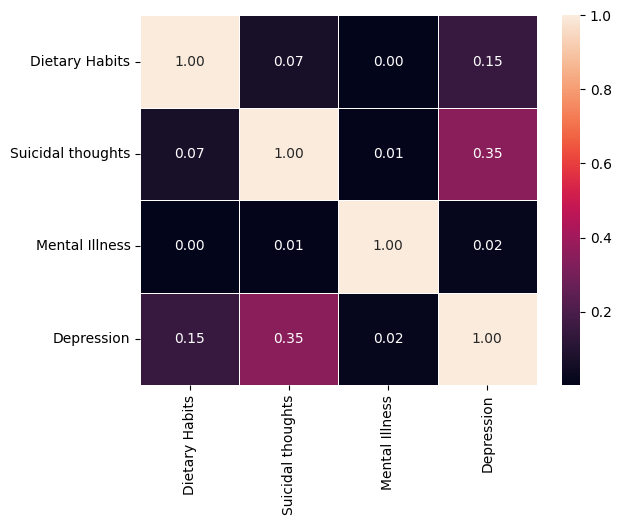

In [122]:
# heatmap
corr = associtation.corr()
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

It shows that there are no positive strong relation with the dietary habits with the mental illness aspects which may reveal that there are other factors that may influcence the dietary habits 

# STUDENT DATA

In [123]:
# Extract only the student data and rename 'Work/Study Hours' to 'Study Hours'
student_df = df[df['Working Professional or Student'] == 'Student']
student_df.rename({'Work/Study Hours':'Study Hours'},axis=1,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15568\1686071978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_df.rename({'Work/Study Hours':'Study Hours'},axis=1,inplace=True)


In [124]:
# Drop coloumns
try:
    student_df = student_df.drop(['Profession','Working Professional or Student','Work Pressure','Job Satisfaction'],axis=1)
except:
    print('Already dropped')
else:
    print('Dropped successfully')

Dropped successfully


In [125]:
# Check null values
student_df.isna().sum()

Gender                 0
Age                    0
Academic Pressure      9
CGPA                   9
Study Satisfaction    10
Sleep Duration         0
Dietary Habits         0
Degree                 0
Suicidal thoughts      0
Study Hours            0
Financial Stress       0
Mental Illness         0
Depression             0
dtype: int64

In [126]:
# Backward fill the NaN values
student_df = student_df.fillna(method='bfill')
student_df

C:\Users\user\AppData\Local\Temp\ipykernel_15568\791308040.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  student_df = student_df.fillna(method='bfill')


,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal thoughts,Study Hours,Financial Stress,Mental Illness,Depression
2,1,33,5,8.97,2,2,1,3,1,3,1,0,1
8,0,24,2,5.90,5,2,2,3,0,3,2,1,0
26,1,31,3,7.03,5,1,1,3,0,9,1,1,0
30,0,28,3,5.59,2,2,2,3,1,4,5,1,1
32,0,25,4,8.13,3,2,2,2,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,0,27,5,5.75,5,2,3,5,1,7,1,1,0
140686,1,27,2,9.40,3,1,1,2,0,0,3,1,0
140689,1,31,3,6.61,4,2,3,2,0,12,2,0,0
140690,0,18,5,6.88,2,1,1,5,1,10,5,0,1


# RQ2. Analyze the relationship between sleep duration and academic performance (i.e. Academic Pressure, CGPA, Study hours, Study satisfaction) 


In [127]:
# Extract only necessary data
student_df_sleep_academic = student_df[['Academic Pressure','CGPA','Study Satisfaction','Sleep Duration','Study Hours']]
student_df_sleep_academic.head()

,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Study Hours
2,5,8.97,2,2,3
8,2,5.90,5,2,3
26,3,7.03,5,1,9
30,3,5.59,2,2,4
32,4,8.13,3,2,1


In [128]:
# CGPA information
highest_cgpa = student_df_sleep_academic['CGPA'].max()
lowest_cgpa = student_df_sleep_academic['CGPA'].min()
avg_cgpa = student_df_sleep_academic['CGPA'].mean()

print(f'The highest CGPA: {highest_cgpa}')
print(f'The lowest CGPA: {lowest_cgpa}')
print(f'The average CPGA: {avg_cgpa:.2f}')

The highest CGPA: 10.0
The lowest CGPA: 5.03
The average CPGA: 7.66


In [129]:
# comparing average CPGA in each of the study satisfaction group

cgpa_mean = student_df_sleep_academic.groupby(['Study Satisfaction'])['CGPA'].mean().round(2)


# Calculate the mode of Academic Pressure and filter out zeros
def get_non_zero_mode(x):
    modes = x[x != 0].mode()
    return modes[0] if not modes.empty else None  # Return None if no non-zero mode exists

academic_press = student_df_sleep_academic.groupby(['Study Satisfaction'])['Academic Pressure'].apply(get_non_zero_mode)

# Combine the results into a single DataFrame
combined_df = pd.DataFrame({
    'Average CGPA': cgpa_mean,
    'Academic Pressure': academic_press
})

# Display the combined DataFrame
combined_df

,Average CGPA,Academic Pressure
Study Satisfaction,,
1,7.74,5
2,7.73,5
3,7.62,3
4,7.64,3
5,7.53,3


This shows that the higher CGPA the student gets, the less the student becomes satisfied with their score which can be interpretated as the students in these groups (study satisfaction 1) tend to be a hardworking students who want to achieve good grades whereas for students who are in group (study satisfaction group 5) tend to be less hard working students despite their CGPA is lower than the average CGPA and being highly satisfied with their grade which can be proved by the academic pressure columns where the higher it is, the less satisfed they are with their scores whereas the lower the pressure, the more satisfied they are

In [130]:
# comparing sleep duration with CGPA and study hours 
student_df_sleep_academic.groupby(['Sleep Duration'])[['CGPA','Study Hours']].mean().round(2)

,CGPA,Study Hours
Sleep Duration,,
1,7.64,7.19
2,7.66,7.14
3,7.71,8.0


Despite the sleep duration being different, most of the students on average are able to attain the CGPA is similar range with the CGPA average with the study hours also being in the similar range for all groups

# Model to predict depression in students

In [131]:
# Standard Scaler on numerical conitous values
scaler = StandardScaler()
student_df[['CGPA']] = scaler.fit_transform(student_df[['CGPA']])
student_df[['Age']] = scaler.fit_transform(student_df[['Age']])
student_df[['Study Hours']] = scaler.fit_transform(student_df[['Study Hours']])


student_df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal thoughts,Study Hours,Financial Stress,Mental Illness,Depression
2,1,1.463165,5,0.895579,2,2,1,3,1,-1.121213,1,0,1
8,0,-0.371474,2,-1.200756,5,2,2,3,0,-1.121213,2,1,0
26,1,1.055467,3,-0.429141,5,1,1,3,0,0.497095,1,1,0
30,0,0.443921,3,-1.412438,2,2,2,3,1,-0.851495,5,1,1
32,0,-0.167625,4,0.321989,3,2,2,2,1,-1.660650,1,0,0


In [132]:
# initalizing x and y then split data
target_names = ['Student with Depression', 'Student without Depression']
Student_X = student_df.drop(['Depression'],axis=1)
Student_y = student_df['Depression']

X_train, X_test, y_train, y_test = train_test_split(Student_X, Student_y, test_size=0.25, random_state=16)




In [133]:
# model performance
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=10),
    "Random Forest": RandomForestClassifier(max_depth=10, random_state=0),
    "SVM": SVC(kernel='linear', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=3)
    
}

student_result = []

for model_name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print(f'Performance of {model_name}:')
    print(classification_report(y_test, y_pred, target_names=target_names))
    report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    #print(report)
    print('-'*60)
    
    student_result.append({
        "Student Prediction Model": model_name,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"],
        "Accuracy": report['accuracy']
    })

Performance of Logistic Regression:
                            precision    recall  f1-score   support

   Student with Depression       0.84      0.80      0.82      2892
Student without Depression       0.86      0.89      0.88      4084

                  accuracy                           0.85      6976
                 macro avg       0.85      0.85      0.85      6976
              weighted avg       0.85      0.85      0.85      6976

------------------------------------------------------------
Performance of Decision Tree:
                            precision    recall  f1-score   support

   Student with Depression       0.72      0.74      0.73      2892
Student without Depression       0.81      0.80      0.80      4084

                  accuracy                           0.77      6976
                 macro avg       0.77      0.77      0.77      6976
              weighted avg       0.77      0.77      0.77      6976

---------------------------------------------------

In [134]:
# Turn into Data Frame
student_results_df = pd.DataFrame(student_result)


# Convert decimals to percentages (%)
for column_name in student_results_df.columns[1:]:
    student_results_df[column_name] = student_results_df[column_name].transform(lambda x: '{:,.2%}'.format(x))
student_results_df

,Student Prediction Model,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,85.25%,85.29%,85.24%,85.29%
1,Decision Tree,77.36%,77.26%,77.31%,77.26%
2,Random Forest,84.57%,84.62%,84.54%,84.62%
3,SVM,85.35%,85.39%,85.34%,85.39%
4,KNN,80.54%,80.63%,80.55%,80.63%


Student Model performed decent but decision tree performed the poorest being below 80% which highlights its' limitation in predicting depression in students

## WORKING ADULT DATA

In [135]:
worker_df = df[df['Working Professional or Student'] == 'Working Professional']
worker_df.head()

,Gender,Age,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal thoughts,Work/Study Hours,Financial Stress,Mental Illness,Depression
0,0,49,Working Professional,Chef,<NA>,5,NaN,<NA>,2,2,1,3,0,1,2,0,0
1,1,26,Working Professional,Teacher,<NA>,4,NaN,<NA>,3,1,3,4,1,7,3,0,1
3,1,22,Working Professional,Teacher,<NA>,5,NaN,<NA>,1,1,2,3,1,10,1,1,1
4,0,30,Working Professional,Business Analyst,<NA>,1,NaN,<NA>,1,2,3,3,1,9,4,1,0
5,0,59,Working Professional,Finanancial Analyst,<NA>,2,NaN,<NA>,5,2,1,2,0,7,5,0,0


In [136]:
# rename field
worker_df = worker_df.rename({'Work/Study Hours': 'Work Hours'},axis=1)

In [137]:
# Drop columns
try:
    worker_df = worker_df.drop(['Working Professional or Student', 'Academic Pressure', 'CGPA', 'Study Satisfaction'], axis=1)
except:
    print("Already dropped")
else:
    print("Dropped Successfully")

Dropped Successfully


In [138]:
worker_df.head()

,Gender,Age,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal thoughts,Work Hours,Financial Stress,Mental Illness,Depression
0,0,49,Chef,5,2,2,1,3,0,1,2,0,0
1,1,26,Teacher,4,3,1,3,4,1,7,3,0,1
3,1,22,Teacher,5,1,1,2,3,1,10,1,1,1
4,0,30,Business Analyst,1,1,2,3,3,1,9,4,1,0
5,0,59,Finanancial Analyst,2,5,2,1,2,0,7,5,0,0


In [139]:
# Check NAN values
worker_df.isna().sum()

Gender                  0
Age                     0
Profession           8763
Work Pressure          20
Job Satisfaction       17
Sleep Duration          0
Dietary Habits          0
Degree                  0
Suicidal thoughts       0
Work Hours              0
Financial Stress        0
Mental Illness          0
Depression              0
dtype: int64

In [140]:
def categorize_job(title):
    fields = {
    'Business': ['Business Analyst', 'Financial Analyst', 'Accountant', 'Entrepreneur', 'Marketing Manager', 'Investment Banker', 'Sales Executive', 'Digital Marketer'],
    'Engineering/Computer': ['Software Engineer', 'Data Scientist', 'Civil Engineer', 'Mechanical Engineer'],
    'Healthcare': ['Doctor', 'Pharmacist', 'Medical Doctor'],
    'Education': ['Teacher'],
    'Pharmaceutical': ['Chemist'],
    'Architecture': ['Architect'],
    'Law': ['Judge', 'Lawyer'],
    'F&B': ['Chef', 'Customer Support'],
    'Aviation': ['Pilot'],
    'Creative Arts': ['Graphic Designer', 'Content Writer','UX/UI Designer'],
    'Consultant': ['Consultant', 'Family Consultant', 'Travel Consultant', 'Educational Consultant'],
    'Construction': ['Plumber', 'Electrician']
    }
    for field, titles in fields.items():
        if title in titles:
            return field
    return np.nan

# Categorize the profession based on the job titles
worker_df['Profession'] = worker_df['Profession'].apply(categorize_job)

# Backward fill on NaN values
worker_df['Profession'] = worker_df['Profession'].fillna(method='bfill')
worker_df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_15568\2031877592.py:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  worker_df['Profession'] = worker_df['Profession'].fillna(method='bfill')


,Gender,Age,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal thoughts,Work Hours,Financial Stress,Mental Illness,Depression
0,0,49,F&B,5,2,2,1,3,0,1,2,0,0
1,1,26,Education,4,3,1,3,4,1,7,3,0,1
3,1,22,Education,5,1,1,2,3,1,10,1,1,1
4,0,30,Business,1,1,2,3,3,1,9,4,1,0
5,0,59,Pharmaceutical,2,5,2,1,2,0,7,5,0,0


In [141]:
# Backward Fill NAN 
worker_df = worker_df.fillna(method='bfill')
worker_df

C:\Users\user\AppData\Local\Temp\ipykernel_15568\2143591268.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  worker_df = worker_df.fillna(method='bfill')


,Gender,Age,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal thoughts,Work Hours,Financial Stress,Mental Illness,Depression
0,0,49,F&B,5,2,2,1,3,0,1,2,0,0
1,1,26,Education,4,3,1,3,4,1,7,3,0,1
3,1,22,Education,5,1,1,2,3,1,10,1,1,1
4,0,30,Business,1,1,2,3,3,1,9,4,1,0
5,0,59,Pharmaceutical,2,5,2,1,2,0,7,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140694,0,45,Education,2,5,1,2,3,1,1,5,0,0
140695,0,18,Creative Arts,5,4,2,3,5,0,2,4,1,1
140696,0,41,Creative Arts,5,4,2,2,3,1,6,5,1,0
140697,0,24,Business,3,1,2,2,3,0,4,4,0,0


# RQ3. Analyze how work pressure affects job satisfaction among different working professionals (i.e. Profession, Job Satisfaction, Financial Stress, Work hours)

In [142]:
job_satisfaction = worker_df[['Profession','Work Pressure', 'Job Satisfaction','Work Hours','Financial Stress']]
job_satisfaction.head()

,Profession,Work Pressure,Job Satisfaction,Work Hours,Financial Stress
0,F&B,5,2,1,2
1,Education,4,3,7,3
3,Education,5,1,10,1
4,Business,1,1,9,4
5,Pharmaceutical,2,5,7,5


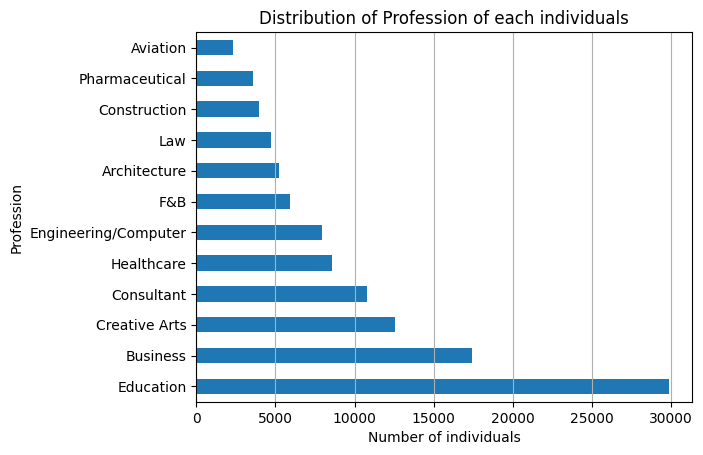

In [143]:
# Distribution of Professions
ax = job_satisfaction['Profession'].value_counts().plot(kind='barh')
plt.grid(axis='x')
plt.title('Distribution of Profession of each individuals')
plt.xlabel('Number of individuals')
plt.show()

To analyze the work pressure affecting job satisfaction among different working professionals, the data consisted of numerous job titles that were complicated. Therefore, the profession is grouped into 12 fields and the result shows the majority of the individuals work in the education field with almost 30000 workers while Aviation had the lowest with about 2500 workers.  

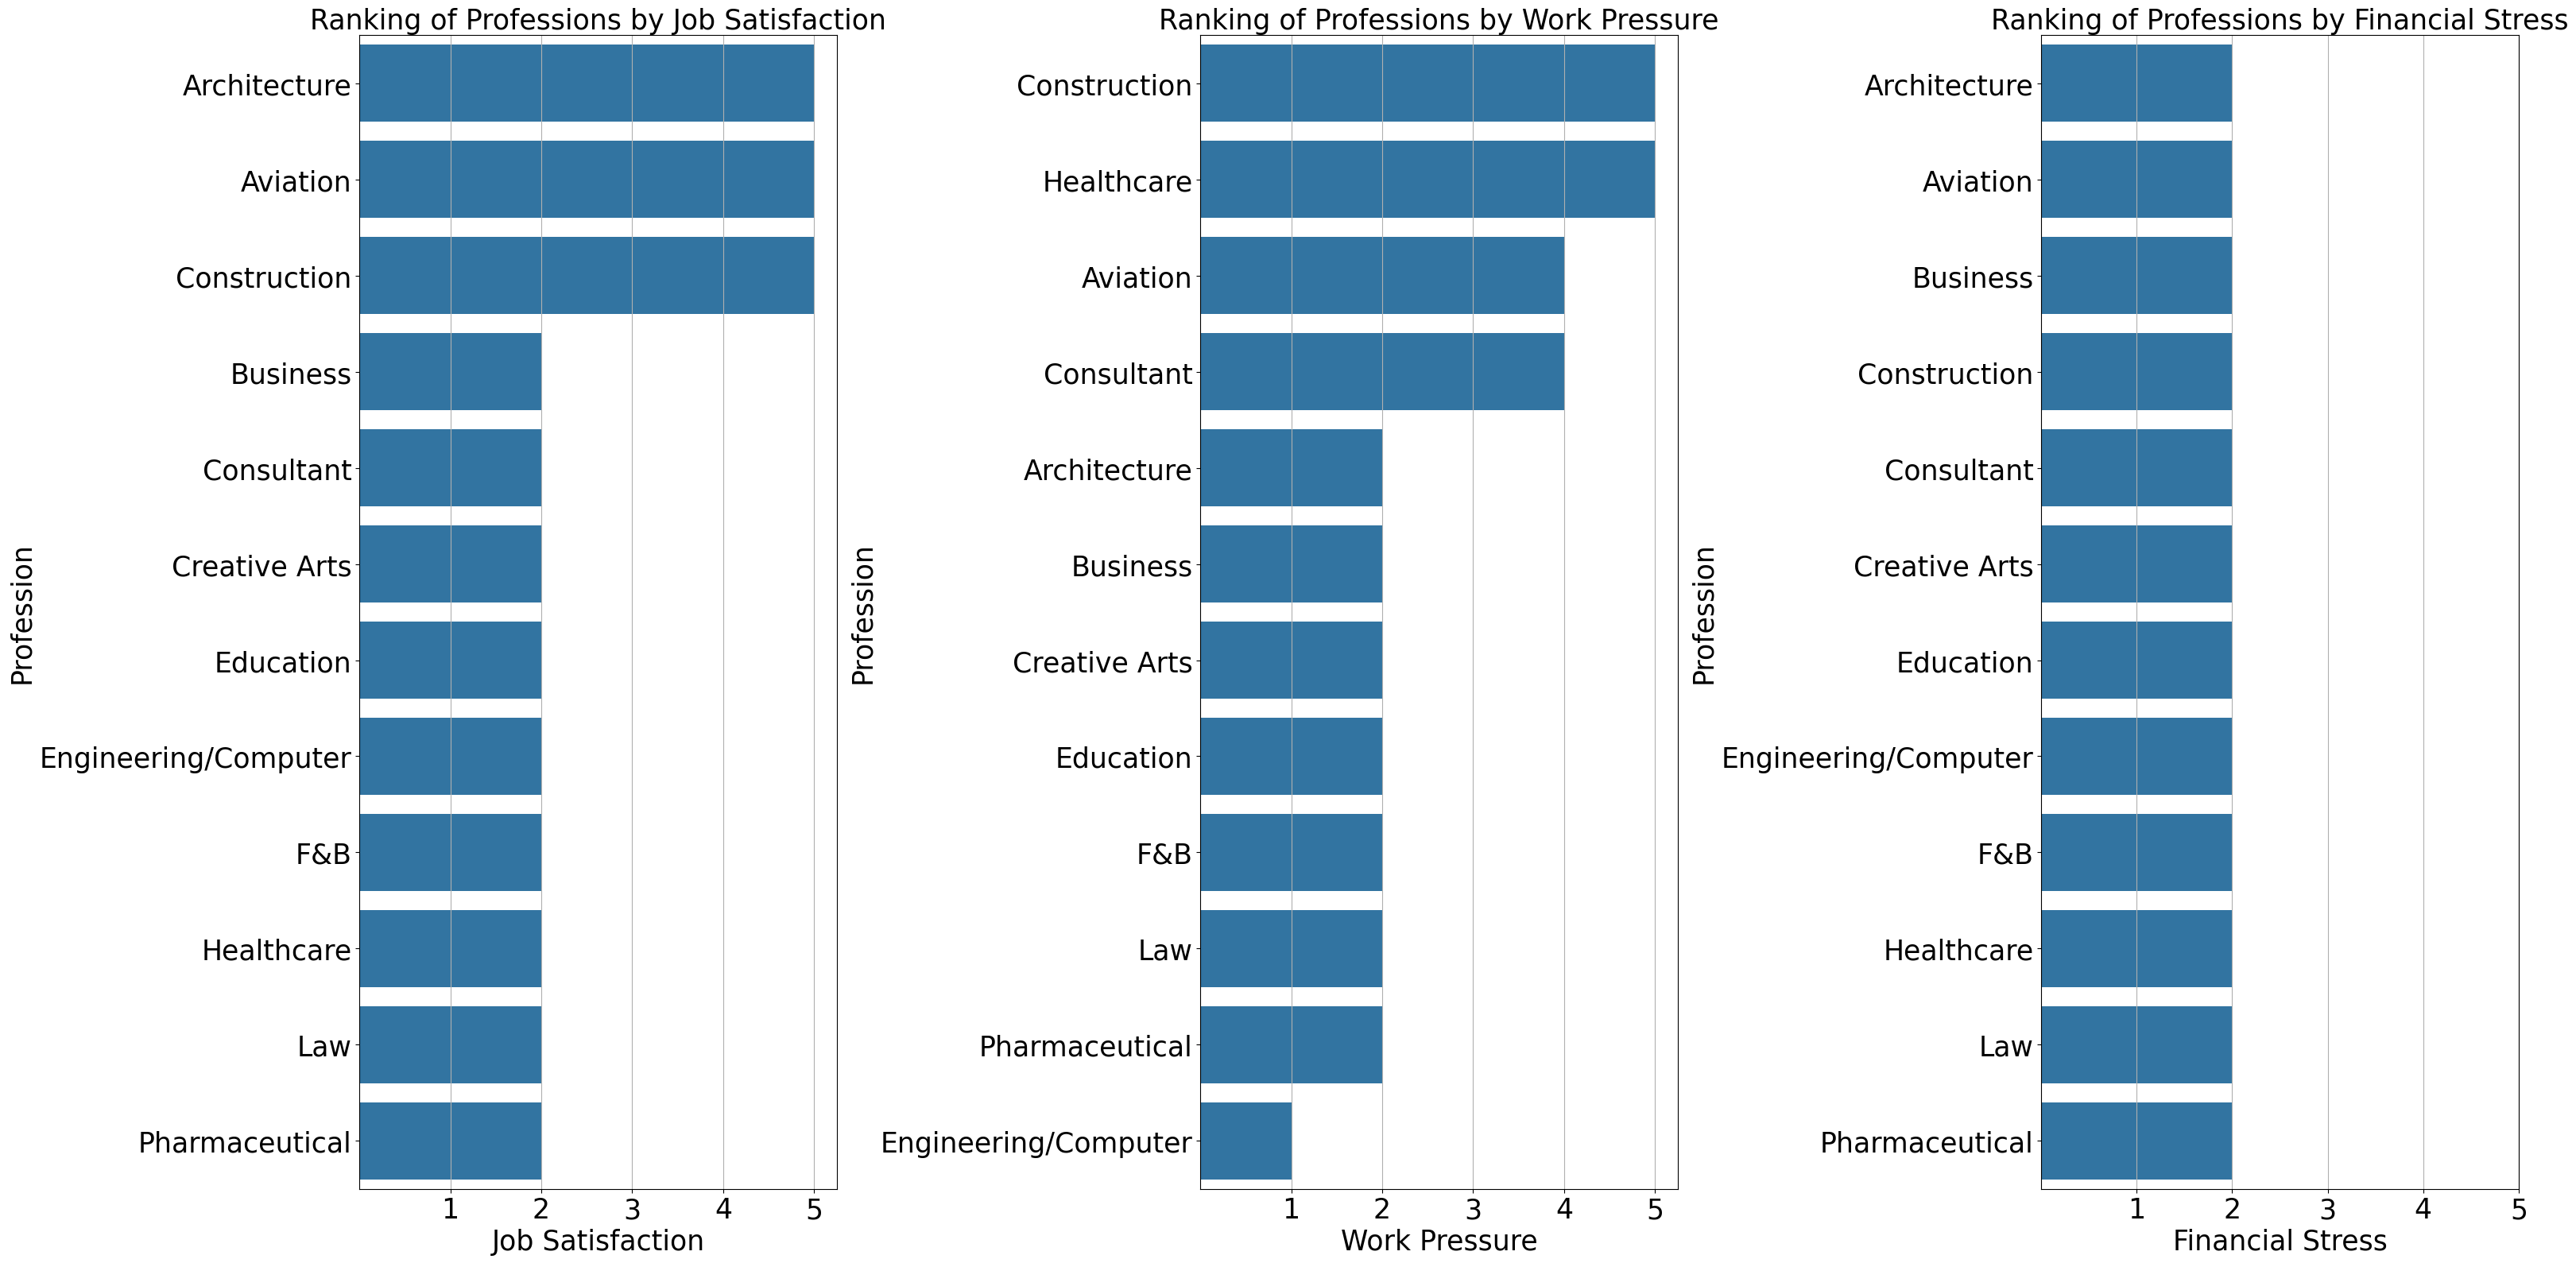

In [144]:
mode_work_satisfaction = job_satisfaction.groupby(['Profession'])['Job Satisfaction'].apply(pd.Series.mode)
mode_work_satisfaction_df = mode_work_satisfaction.reset_index()[['Profession','Job Satisfaction']].sort_values(by=['Job Satisfaction'], ascending=False)

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(32, 16))

sns.barplot(x='Job Satisfaction', y='Profession', data=mode_work_satisfaction_df, ax=ax[0])
ax[0].set_title('Ranking of Professions by Job Satisfaction',fontsize=25)
ax[0].set_xlabel('Job Satisfaction',fontsize=25)
ax[0].set_ylabel('Profession',fontsize=25)
ax[0].grid(axis='x')
ax[0].set_xticks([1, 2, 3, 4, 5])
ax[0].set_xticklabels([1, 2, 3, 4, 5],fontsize=25)

for tick in ax[0].get_yticklabels():
    tick.set_fontsize(25)

mode_work_pressure =job_satisfaction.groupby(['Profession'])['Work Pressure'].apply(pd.Series.mode)
mode_work_pressure_df = mode_work_pressure.reset_index()[['Profession','Work Pressure']].sort_values(by=['Work Pressure'], ascending=False)

sns.barplot(x='Work Pressure', y='Profession', data=mode_work_pressure_df ,ax=ax[1])
ax[1].set_title('Ranking of Professions by Work Pressure',fontsize=25)
ax[1].set_xlabel('Work Pressure',fontsize=25)
ax[1].set_ylabel('Profession',fontsize=25)
ax[1].grid(axis='x')
ax[1].set_xticks([1, 2, 3, 4, 5])
ax[1].set_xticklabels([1, 2, 3, 4, 5],fontsize=25)

for tick in ax[1].get_yticklabels():
    tick.set_fontsize(25)

mode_work_finance =job_satisfaction.groupby(['Profession'])['Financial Stress'].apply(pd.Series.mode)
mode_work_finance_df = mode_work_finance.reset_index()[['Profession','Financial Stress']].sort_values(by=['Financial Stress'], ascending=False)

sns.barplot(x='Financial Stress', y='Profession', data=mode_work_finance_df,ax=ax[2])

ax[2].set_title('Ranking of Professions by Financial Stress',fontsize=25)
ax[2].set_xlabel('Financial Stress',fontsize=25)
ax[2].set_ylabel('Profession',fontsize=25)
ax[2].grid(axis='x')
ax[2].set_xticks([1, 2, 3, 4, 5])
ax[2].set_xticklabels([1, 2, 3, 4, 5],fontsize=25)

for tick in ax[2].get_yticklabels():
    tick.set_fontsize(25)
# Show the plots
plt.tight_layout()
plt.show()

Three categories were used to evaluate the work pressure affecting job satisfaction: ‘Job satisfaction’, ‘Financial Stress’, and ‘Work pressure’, and they are categorized on a scale ranging from 1: ‘Not Satisfied at all’ for Job satisfaction, ‘No pressure at all’ for Work pressure, and ‘No financial stress’ for financial stress, to 5: ‘Very satisfied’ for Job satisfaction, ‘Very high financial stress’ for Financial Stress, and ‘Very high pressure’ for the Work pressure.  Hence, the statical method ‘mode’ was used to find the most common scale bar in each field on the following categories:

The findings reveal that Architecture, Aviation, and Construction had the highest number of work satisfaction on a scale of 5 and the rest on a scale of 2. This implies that workers in these 3 industries may have found their passion despite Aviation and Construction being in the top 3 jobs with the highest work pressure which may potentially harm their mental health. One reason behind this could be the earnings because these 3 jobs' income are sustainable to live by which is proved by the Financial Stress Category where all these 3 jobs fields fall under the scale range 2 implying it is a well-paying position that contributes positively to one’s quality life. 

# Model to predict depression in working adults

In [145]:
# Convert categorical string values to categorical numerical values
convert_to_categorical(worker_df, 'Profession')
worker_df.head()

,Gender,Age,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal thoughts,Work Hours,Financial Stress,Mental Illness,Depression
0,0,49,8,5,2,2,1,3,0,1,2,0,0
1,1,26,6,4,3,1,3,4,1,7,3,0,1
3,1,22,6,5,1,1,2,3,1,10,1,1,1
4,0,30,2,1,1,2,3,3,1,9,4,1,0
5,0,59,11,2,5,2,1,2,0,7,5,0,0


In [146]:
# standard scaler on numerical data values
scaler = StandardScaler()
worker_df[['Age']] = scaler.fit_transform(worker_df[['Age']])
worker_df[['Work Hours']] = scaler.fit_transform(worker_df[['Work Hours']])


worker_df.head()

,Gender,Age,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal thoughts,Work Hours,Financial Stress,Mental Illness,Depression
0,0,0.457423,8,5,2,2,1,3,0,-1.304100,2,0,0
1,1,-1.643202,6,4,3,1,3,4,1,0.251796,3,0,1
3,1,-2.008528,6,5,1,1,2,3,1,1.029744,1,1,1
4,0,-1.277876,2,1,1,2,3,3,1,0.770428,4,1,0
5,0,1.370738,11,2,5,2,1,2,0,0.251796,5,0,0


In [147]:
# set our x and y then split the data
target_names = ['Working Adult with Depression', 'Working Adult without Depression']
Worker_X = worker_df.drop(['Depression'],axis=1)
Worker_y = worker_df['Depression']

X_train, X_test, y_train, y_test = train_test_split(Worker_X, Worker_y, test_size=0.25, random_state=16)




In [ ]:
# model performance
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=10),
    "Random Forest": RandomForestClassifier(max_depth=10, random_state=0),
    "SVM": SVC(kernel='linear', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=3)
    
}

worker_result = []

for model_name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print(f'Performance of {model_name}:')
    print(classification_report(y_test, y_pred, target_names=target_names))
    report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    #print(report)
    print('-'*60)
    
    worker_result.append({
        "Worker Prediction Model": model_name,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"],
        "Accuracy": report['accuracy']
    })

Performance of Logistic Regression:
                                  precision    recall  f1-score   support

   Working Adult with Depression       0.97      0.99      0.98     25870
Working Adult without Depression       0.82      0.69      0.75      2330

                        accuracy                           0.96     28200
                       macro avg       0.90      0.84      0.86     28200
                    weighted avg       0.96      0.96      0.96     28200

------------------------------------------------------------
Performance of Decision Tree:
                                  precision    recall  f1-score   support

   Working Adult with Depression       0.97      0.96      0.96     25870
Working Adult without Depression       0.59      0.64      0.61      2330

                        accuracy                           0.93     28200
                       macro avg       0.78      0.80      0.79     28200
                    weighted avg       0.94      0.93 

In [ ]:
# Turn into Data Frame
worker_results_df = pd.DataFrame(worker_result)


# Convert decimals to percentages (%)
for column_name in worker_results_df.columns[1:]:
    worker_results_df[column_name] = worker_results_df[column_name].transform(lambda x: '{:,.2%}'.format(x))
worker_results_df

,Worker Prediction Model,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,95.99%,96.19%,96.04%,96.19%
1,Decision Tree,93.62%,93.38%,93.50%,93.38%
2,Random Forest,95.80%,96.05%,95.83%,96.05%
3,SVM,95.99%,96.19%,96.04%,96.19%
4,KNN,95.05%,95.31%,95.14%,95.31%


Working adult model performanced significantly better than student model being above 90% for all model while decision tree being the lowest but still acceptable

# One possible reason why worker model predicted much better than student model

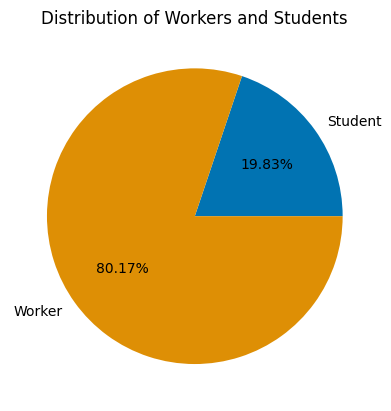

In [ ]:
distribution = df.groupby(['Working Professional or Student'])['Working Professional or Student'].count()
label = ['Student','Worker']
palette_color = sns.color_palette('colorblind') 

plt.title('Distribution of Workers and Students')
plt.pie(distribution,labels = label, colors=palette_color, autopct ='%.02f%%')
plt.show()

worker takes up 80% of the data and remaining for the student. This caused a class imbalance when classifying depression within the two categories; student and workers led to a larger volume of data that contributed more to the worker model performance than the student model. 